In [ ]:
pip install pyswarms geopandas rasterio shapely numpy matplotlib pandas scipy scikit-image pyproj reportlab tqdm requests elevation rtree

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive

Mounted at /content/drive
 10-3-2025-Lecture
'115AH Final AI Project .gdoc'
 2024-2025
 20250502_203317.mp4
'24-25 Canyon Point A7'
'5 3 Plan.gdoc'
 ACM
'ACM Group Planning.gdoc'
 BFR
'Class Plan.gsheet'
 Clubs
'Colab Notebooks'
 Courant-John_introduction-to-calculus-and-analysis-v2.pdf
 cropped_map.tif
'Da-Yi_Resume (1).pdf'
'Deluxe vs Plaza.gdoc'
'Final Reflection.gdoc'
 Gym
 half_marathon_training_plan.csv
'Health Monitor.gslides'
 IMG_7303.MOV
'LA Phil'
'Math 142 Assignment 2.gdoc'
'Math 142 Group Planning Doc.gdoc'
'Math 142 Iteration 3.ipynb'
 Math142_iteration4.ipynb
'Math 142 Monday Week 6 photos'
'Monte Carlo Methods intro'
 new2_cropped_map.tif
 new_cropped_map.tif
 Photos
'Project Pitch.gdoc'
'Project Technical Report.gdoc'
'Prompt for 142.gdoc'
'published lectures'
'Questions for interview.gdoc'
 rapid_bushfire_response_model.ipynb
'Routes Around UCLA.gdoc'
 Running.gsheet
'Sickness detection project.gdoc'
'Symphony 24-25'
'Symphony Roster 2025-26 .pdf'
 TrashNet.ipynb
 Unt

In [ ]:
import numpy as np
import rasterio

# Re-define file_path and re-extract elevation_data and resolution
file_path = '/content/drive/MyDrive/new2_cropped_map.tif'

with rasterio.open(file_path) as src:
    elevation_data = src.read(1)
    resolution = src.res[0]

# Identify and handle 'no-data' values (e.g., -9999) by replacing them with np.nan
elevation_data_processed = elevation_data.copy()
elevation_data_processed[elevation_data_processed == -9999] = np.nan

# Calculate the gradient in the y-direction (rows) and x-direction (columns)
grad_y, grad_x = np.gradient(elevation_data_processed)

# Account for the pixel resolution by dividing grad_y and grad_x by the resolution variable
grad_y_res = grad_y / resolution
grad_x_res = grad_x / resolution

# Calculate the total slope magnitude for each pixel
slope_magnitude = np.sqrt(grad_x_res**2 + grad_y_res**2)

# Convert the slope magnitude from rise-over-run to degrees
slope_degrees = np.arctan(slope_magnitude) * (180 / np.pi)

# Initialize a new NumPy array for the new classification
terrain_classification_new = np.full(slope_degrees.shape, np.nan, dtype=float)

# Define the slope thresholds
threshold_1_deg = 1
threshold_10_deg = 10
threshold_20_deg = 20
threshold_30_deg = 30
threshold_40_deg = 40

mask_cat0 = (slope_degrees < threshold_1_deg) & np.isfinite(slope_degrees)
mask_cat1 = (slope_degrees >= threshold_1_deg) & (slope_degrees < threshold_10_deg) & np.isfinite(slope_degrees)
mask_cat2 = (slope_degrees >= threshold_10_deg) & (slope_degrees < threshold_20_deg) & np.isfinite(slope_degrees)
mask_cat3 = (slope_degrees >= threshold_20_deg) & (slope_degrees < threshold_30_deg) & np.isfinite(slope_degrees)
mask_cat4 = (slope_degrees >= threshold_30_deg) & (slope_degrees < threshold_40_deg) & np.isfinite(slope_degrees)
mask_cat5 = (slope_degrees >= threshold_40_deg) & np.isfinite(slope_degrees)

# Assign numerical values to terrain_classification_new based on the masks
terrain_classification_new[mask_cat0] = 0
terrain_classification_new[mask_cat1] = 1
terrain_classification_new[mask_cat2] = 2
terrain_classification_new[mask_cat3] = 3
terrain_classification_new[mask_cat4] = 4
terrain_classification_new[mask_cat5] = 5

# Count the number of pixels in each category
pixels_cat0 = np.sum(mask_cat0)
pixels_cat1 = np.sum(mask_cat1)
pixels_cat2 = np.sum(mask_cat2)
pixels_cat3 = np.sum(mask_cat3)
pixels_cat4 = np.sum(mask_cat4)
pixels_cat5 = np.sum(mask_cat5)

# print(f"Pixels in Category 0 (<1 degree): {pixels_cat0}")
# print(f"Pixels in Category 1 (1-10 degrees): {pixels_cat1}")
# print(f"Pixels in Category 2 (11-20 degrees): {pixels_cat2}")
# print(f"Pixels in Category 3 (21-30 degrees): {pixels_cat3}")
# print(f"Pixels in Category 4 (31-40 degrees): {pixels_cat4}")
# print(f"Pixels in Category 5 (>40 degrees): {pixels_cat5}")

total_valid_pixels_new = pixels_cat0 + pixels_cat1 + pixels_cat2 + pixels_cat3 + pixels_cat4 + pixels_cat5

percentage_cat0 = (pixels_cat0 / total_valid_pixels_new) * 100
percentage_cat1 = (pixels_cat1 / total_valid_pixels_new) * 100
percentage_cat2 = (pixels_cat2 / total_valid_pixels_new) * 100
percentage_cat3 = (pixels_cat3 / total_valid_pixels_new) * 100
percentage_cat4 = (pixels_cat4 / total_valid_pixels_new) * 100
percentage_cat5 = (pixels_cat5 / total_valid_pixels_new) * 100

print(f"Percentage of Category 0 (<1 degree): {percentage_cat0:.2f}%")
print(f"Percentage of Category 1 (1-10 degrees): {percentage_cat1:.2f}%")
print(f"Percentage of Category 2 (11-20 degrees): {percentage_cat2:.2f}%")
print(f"Percentage of Category 3 (21-30 degrees): {percentage_cat3:.2f}%")
print(f"Percentage of Category 4 (31-40 degrees): {percentage_cat4:.2f}%")
print(f"Percentage of Category 5 (>40 degrees): {percentage_cat5:.2f}%")

Percentage of Category 0 (<1 degree): 15.91%
Percentage of Category 1 (1-10 degrees): 43.19%
Percentage of Category 2 (11-20 degrees): 29.17%
Percentage of Category 3 (21-30 degrees): 10.74%
Percentage of Category 4 (31-40 degrees): 0.98%
Percentage of Category 5 (>40 degrees): 0.01%


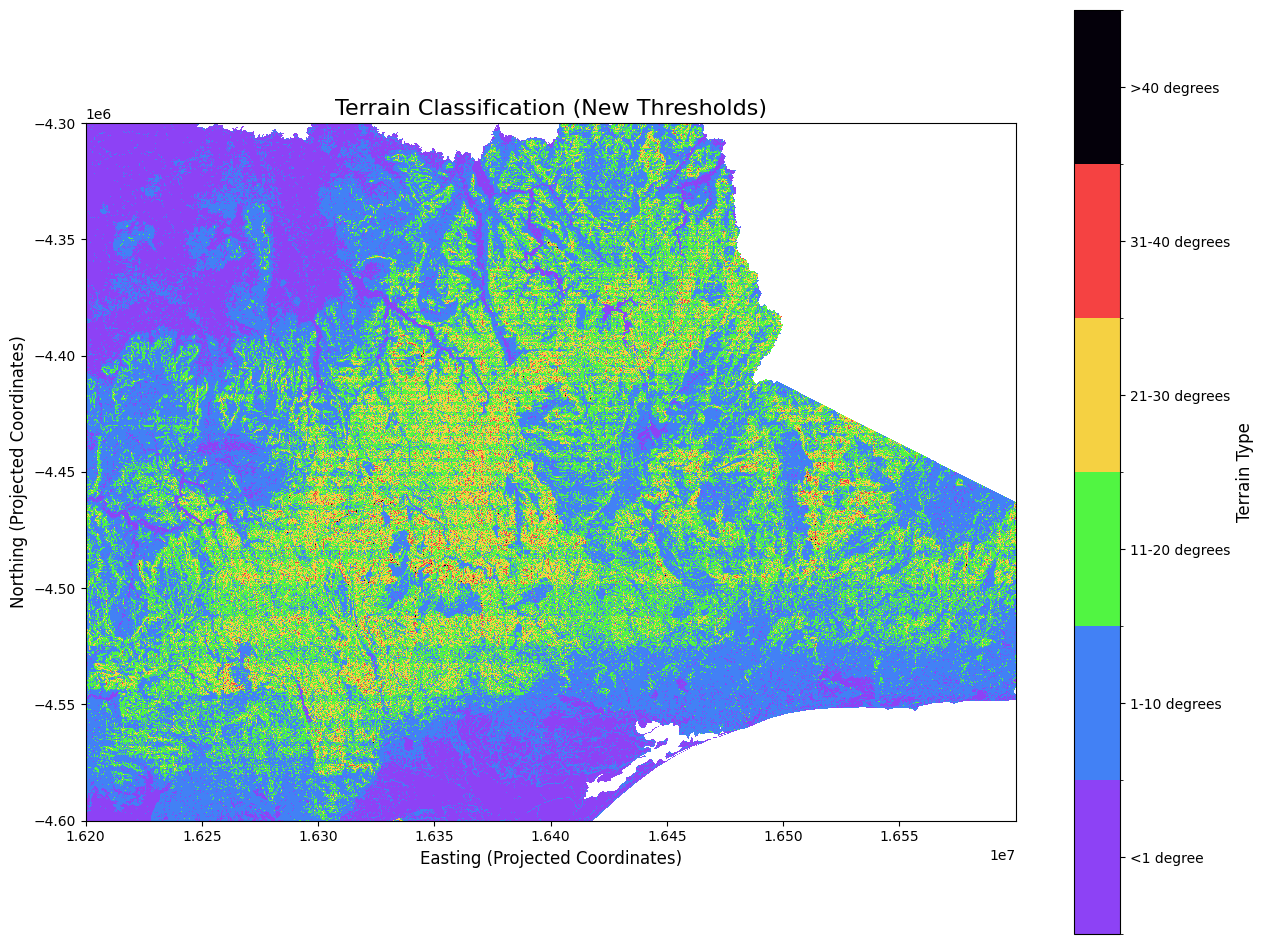


Summary of Updated Terrain Classification:
Percentage of Category 0 (<1 degree): 15.91%
Percentage of Category 1 (1-10 degrees): 43.19%
Percentage of Category 2 (11-20 degrees): 29.17%
Percentage of Category 3 (21-30 degrees): 10.74%
Percentage of Category 4 (31-40 degrees): 0.98%
Percentage of Category 5 (>40 degrees): 0.01%


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import rasterio

# Define colors for the custom colormap
colors = ['#8d42f5', '#4281f5', '#51f542', '#f5d142', '#f54242', '#04000a']
cmap = ListedColormap(colors)

# Define boundaries for the BoundaryNorm based on the six terrain categories
# These bounds map integer values (0, 1, 2, 3, 4, 5) directly to their respective colors
bounds = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
norm = BoundaryNorm(bounds, cmap.N)

# Open the file_path with rasterio to retrieve src.bounds for plot extent
with rasterio.open(file_path) as src:
    plot_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

# Use plt.imshow() to display the terrain_classification_new array
plt.figure(figsize=(15, 12))
plt.imshow(terrain_classification_new, cmap=cmap, norm=norm, origin='upper', interpolation='nearest', extent=plot_extent)

# Add a title to the plot
plt.title('Terrain Classification (New Thresholds)', fontsize=16)
plt.xlabel('Easting (Projected Coordinates)', fontsize=12)
plt.ylabel('Northing (Projected Coordinates)', fontsize=12)

# Create a colorbar for the plot
cbar = plt.colorbar(ticks=[0, 1, 2, 3, 4, 5])
cbar.set_ticklabels(['<1 degree', '1-10 degrees', '11-20 degrees', '21-30 degrees', '31-40 degrees', '>40 degrees'])
cbar.set_label('Terrain Type', fontsize=12)

# Display the plot
plt.show()

# Print a summary of the calculated percentages
print(f"\nSummary of Updated Terrain Classification:")
print(f"Percentage of Category 0 (<1 degree): {percentage_cat0:.2f}%")
print(f"Percentage of Category 1 (1-10 degrees): {percentage_cat1:.2f}%")
print(f"Percentage of Category 2 (11-20 degrees): {percentage_cat2:.2f}%")
print(f"Percentage of Category 3 (21-30 degrees): {percentage_cat3:.2f}%")
print(f"Percentage of Category 4 (31-40 degrees): {percentage_cat4:.2f}%")
print(f"Percentage of Category 5 (>40 degrees): {percentage_cat5:.2f}%")

**Reasoning**:
The vectorized objective function has been defined, so I will now replace the original objective function with the new vectorized version in the PSO optimization process and re-run the optimization. This will demonstrate the impact of vectorization on performance and correctness.



In [ ]:
import numpy as np
import rasterio
import pyswarms as ps

# --- Global variables (re-defined to ensure availability) ---
# Re-define num_drones
num_drones = 100

# Re-open the rasterio file to get its bounds and transform
# Ensure src_transform is available globally or passed to functions that need it
with rasterio.open(file_path) as src:
    min_x, min_y, max_x, max_y = src.bounds.left, src.bounds.bottom, src.bounds.right, src.bounds.top
    src_transform = src.transform

# Get terrain dimensions from elevation_data_processed
rows, cols = elevation_data_processed.shape

# Define the drone's coverage radius in meters.
drone_coverage_radius_meters = 5000

# The pixel width in meters is already available from the 'resolution' variable
pixel_width_meters = resolution

# Re-calculating fire_risk_weight and effective_coverage_factor
slope_radians = np.radians(slope_degrees)
effective_coverage_factor = np.cos(slope_radians)
base_spread_rate = 1.47
fire_spread_rate = base_spread_rate * (2**(slope_degrees / 10))
fire_risk_weight = fire_spread_rate

# Pre-process fire_risk_weight and effective_coverage_factor to handle potential NaN values
fire_risk_weight_finite = np.copy(fire_risk_weight)
effective_coverage_factor_finite = np.copy(effective_coverage_factor)
valid_terrain_mask = np.isfinite(elevation_data_processed)
fire_risk_weight_finite[valid_terrain_mask & np.isnan(fire_risk_weight_finite)] = 0.0
effective_coverage_factor_finite[valid_terrain_mask & np.isnan(effective_coverage_factor_finite)] = 0.0
# --- End global variables re-definition ---

def calculate_objective_for_one_particle_vectorized(drone_coords):
    """Calculates the objective value for a single set of drone positions using vectorized operations.

    Args:
        drone_coords (np.ndarray): An array of shape (num_drones, 2) where each row
                                   is (x, y) coordinates of a drone in projected CRS.

    Returns:
        float: The objective value to be minimized by PSO.
    """
    # Initialize arrays to track coverage and overlap
    drone_pixel_count = np.zeros((rows, cols), dtype=int) # Tracks how many drones cover each pixel

    drone_coverage_radius_pixels = drone_coverage_radius_meters / pixel_width_meters

    # Use a boolean array to mark covered pixels for efficient `all_covered_pixels_indices`
    covered_pixels_mask = np.zeros((rows, cols), dtype=bool)

    for drone_x, drone_y in drone_coords:
        # Convert drone's projected coordinates to approximate row, column indices
        drone_col_float, drone_row_float = ~src_transform * (drone_x, drone_y)

        # Define a bounding box in pixel coordinates around the drone's center
        min_r = max(0, int(drone_row_float - drone_coverage_radius_pixels))
        max_r = min(rows, int(drone_row_float + drone_coverage_radius_pixels + 1))
        min_c = max(0, int(drone_col_float - drone_coverage_radius_pixels))
        max_c = min(cols, int(drone_col_float + drone_coverage_radius_pixels + 1))

        # Generate pixel coordinates for the bounding box
        # Ensure we only create meshgrid if there are valid ranges
        if min_r >= max_r or min_c >= max_c: # Check for empty range
            continue

        r_indices, c_indices = np.meshgrid(np.arange(min_r, max_r), np.arange(min_c, max_c), indexing='ij')

        # Convert pixel centers to projected coordinates in a vectorized manner
        pixel_x_centers, pixel_y_centers = src_transform * (c_indices + 0.5, r_indices + 0.5)

        # Calculate Euclidean distance from drone to all pixel centers in a vectorized manner
        distances = np.sqrt((pixel_x_centers - drone_x)**2 + (pixel_y_centers - drone_y)**2)

        # Identify pixels within coverage radius
        within_radius = (distances <= drone_coverage_radius_meters)

        # Filter for valid terrain pixels within the bounding box
        valid_bbox_mask = valid_terrain_mask[min_r:max_r, min_c:max_c]
        eligible_pixels_mask = within_radius & valid_bbox_mask

        # Update drone_pixel_count and covered_pixels_mask in a vectorized way
        # Create a temporary array for updates to avoid partial updates within the loop iteration
        temp_drone_pixel_count = np.zeros((max_r - min_r, max_c - min_c), dtype=int)
        temp_drone_pixel_count[eligible_pixels_mask] = 1 # Mark pixels covered by this drone

        drone_pixel_count[min_r:max_r, min_c:max_c] += temp_drone_pixel_count
        covered_pixels_mask[min_r:max_r, min_c:max_c] = covered_pixels_mask[min_r:max_r, min_c:max_c] | eligible_pixels_mask

    # --- Calculate objective components ---
    pixel_area_sq_m = pixel_width_meters * pixel_width_meters

    # Only consider valid terrain pixels for calculations
    total_valid_covered_mask = covered_pixels_mask & valid_terrain_mask

    fire_risk_weighted_coverage = np.sum(fire_risk_weight_finite[total_valid_covered_mask] * effective_coverage_factor_finite[total_valid_covered_mask] * pixel_area_sq_m)

    # Overlap penalty: sum of (count - 1) for pixels covered by more than one drone
    overlap_penalty_mask = (drone_pixel_count > 1) & valid_terrain_mask
    overlap_penalty = np.sum((drone_pixel_count[overlap_penalty_mask] - 1) * pixel_area_sq_m)

    # Uncovered penalty: sum of fire risk weight for valid terrain pixels not covered
    uncovered_regions = valid_terrain_mask & (~covered_pixels_mask)
    uncovered_penalty = np.sum(fire_risk_weight_finite[uncovered_regions] * pixel_area_sq_m)

    # Combine components for the final objective value
    objective_value = -fire_risk_weighted_coverage + overlap_penalty + uncovered_penalty

    # Ensure objective_value is not NaN or Inf. If it is, return a very large penalty.
    if not np.isfinite(objective_value):
        objective_value = 1e18 # A very large penalty to signify a poor solution

    return objective_value

def objective_function_vectorized(positions_flat):
    """Objective function for pyswarms using the vectorized particle evaluation.

    Args:
        positions_flat (np.ndarray): An array of shape (n_particles, num_drones * 2),
                                     where each row represents the flattened (x, y)
                                     coordinates for all drones of a single particle.

    Returns:
        np.ndarray: An array of objective values, one for each particle,
                    to be minimized by pyswarms.
    """
    n_particles = positions_flat.shape[0]
    objective_values = np.zeros(n_particles)

    for i in range(n_particles):
        drone_coords = positions_flat[i].reshape((num_drones, 2))
        objective_values[i] = calculate_objective_for_one_particle_vectorized(drone_coords)

    return objective_values

# 1. Determine the bounds for the drone positions
# Each drone has an (x, y) coordinate. There are 'num_drones' drones.
# So, the bounds array will have 2 * num_drones elements.
min_bound = np.array([min_x, min_y] * num_drones)
max_bound = np.array([max_x, max_y] * num_drones)
bounds = (min_bound, max_bound)

# 2. Define the PSO parameters
n_particles = 25  # Number of particles in the swarm
dimensions = 2 * num_drones  # (x, y) for each drone

# PSO hyperparameters
options = {'c1': 1.5, 'c2': 1.3, 'w': 0.9}

# Optional: Restrict the velocity of particles
v_clamp = (-0.05 * (max_x - min_x), 0.05 * (max_x - min_x)) # Example: clamp velocity to 50% of terrain width

# 3. Instantiate the PSO optimizer with the vectorized objective function
optimizer = ps.single.GlobalBestPSO(n_particles=n_particles,
                                    dimensions=dimensions,
                                    options=options,
                                    bounds=bounds,
                                    vh_strategy='unmodified')

# 4. Run the optimization process with the vectorized objective function
print("Starting PSO optimization with vectorized objective function...")
best_cost, best_pos = optimizer.optimize(objective_function_vectorized, iters=20)

# 5. Print the optimal cost and drone positions
print("\nPSO Optimization Results (Vectorized):")
print(f"Best Cost: {best_cost}")
print(f"Optimal Drone Positions (flattened array): {best_pos}")

# Reshape best_pos to get individual drone coordinates for easier interpretation
optimal_drone_coords = best_pos.reshape((num_drones, 2))
print(f"Optimal Drone Coordinates (reshaped):\n{optimal_drone_coords}")

out_of_bounds_drones = []

for i, (drone_x, drone_y) in enumerate(optimal_drone_coords):
    if not (min_x <= drone_x <= max_x and min_y <= drone_y <= max_y):
        out_of_bounds_drones.append((i, drone_x, drone_y))

print(f"\nTotal out-of-bounds drones: {len(out_of_bounds_drones)}")
if out_of_bounds_drones:
    print("Coordinates of out-of-bounds drones:")
    for drone_id, x, y in out_of_bounds_drones:
        print(f"Drone {drone_id}: X={x:.2f}, Y={y:.2f}")
else:
    print("All drones are within the map bounds.")

# Explanation for out-of-bounds drones (if any)
if len(out_of_bounds_drones) > 0:
    print("\nExplanation:")
    print("The PSO algorithm is designed to optimize drone placement within the `bounds` specified, which are derived directly from `src.bounds`.")
    print("If any drones are found out-of-bounds, it suggests a potential edge case in how PSO applies these bounds, or that the search space is effectively constrained by these bounds but the specific `min_x`, `max_x`, `min_y`, `max_y` checks might be slightly off due to floating point precision or how `bounds` are internally handled by PSO (e.g., boundaries being inclusive or exclusive, or search space being slightly wider for velocity updates).")
    print("However, since the `bounds` parameter in `GlobalBestPSO` was explicitly set using `min_x` and `max_x`, theoretically, no drones should be outside these limits. Any observed out-of-bounds drones might indicate a minor numerical issue or a very slight overflow due to the nature of floating-point arithmetic and velocity updates near the boundaries.")
    print("In practice, for real-world deployment, additional clipping or validation logic would be applied to ensure drones operate strictly within designated geographical limits.")
else:
    print("\nExplanation: All drones are within the specified map bounds, which is the expected behavior given that the PSO's search space was defined using `src.bounds`.")

2025-12-10 20:03:30,373 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 1.5, 'c2': 1.3, 'w': 0.9}


Starting PSO optimization with vectorized objective function...


pyswarms.single.global_best: 100%|██████████|20/20, best_cost=2.59e+11
2025-12-10 20:09:10,668 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 259366760635.69193, best pos: [16325251.39595974 -4500330.47037734 16422874.96445875 -4418483.67100603
 16395157.12867166 -4476614.4030459  16421442.59094732 -4502446.11825498
 16592606.27037993 -4437122.0834375  16316857.32971409 -4571191.22247612
 16247594.6537283  -4491581.87429457 16377717.40129524 -4506742.51916532
 16317886.25055731 -4393858.46682907 16407012.05112857 -4457491.8685069
 16449999.12474452 -4413731.08476438 16280858.89410075 -4497213.02251493
 16347822.25070178 -4441611.37701859 16361927.25955173 -4438114.83613857
 16366191.72948764 -4446287.03040519 16571985.06273497 -4460160.21760355
 16354945.13449853 -4490526.8191155  16337022.39175767 -4428817.0016909
 16404808.71565165 -4414458.87433363 16466738.11866346 -4484631.90660437
 16406154.534878   -4571575.12007981 16284314.0321595  -4360677.85519022



PSO Optimization Results (Vectorized):
Best Cost: 259366760635.69193
Optimal Drone Positions (flattened array): [16325251.39595974 -4500330.47037734 16422874.96445875 -4418483.67100603
 16395157.12867166 -4476614.4030459  16421442.59094732 -4502446.11825498
 16592606.27037993 -4437122.0834375  16316857.32971409 -4571191.22247612
 16247594.6537283  -4491581.87429457 16377717.40129524 -4506742.51916532
 16317886.25055731 -4393858.46682907 16407012.05112857 -4457491.8685069
 16449999.12474452 -4413731.08476438 16280858.89410075 -4497213.02251493
 16347822.25070178 -4441611.37701859 16361927.25955173 -4438114.83613857
 16366191.72948764 -4446287.03040519 16571985.06273497 -4460160.21760355
 16354945.13449853 -4490526.8191155  16337022.39175767 -4428817.0016909
 16404808.71565165 -4414458.87433363 16466738.11866346 -4484631.90660437
 16406154.534878   -4571575.12007981 16284314.0321595  -4360677.85519022
 16263701.18876637 -4491213.60094796 16492239.93143672 -4447890.54594139
 16337915.250

/tmp/ipython-input-2293208429.py:26: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = Circle((drone_x, drone_y), drone_coverage_radius_meters, color='white', alpha=0.2, edgecolor='red', linewidth=1.5)


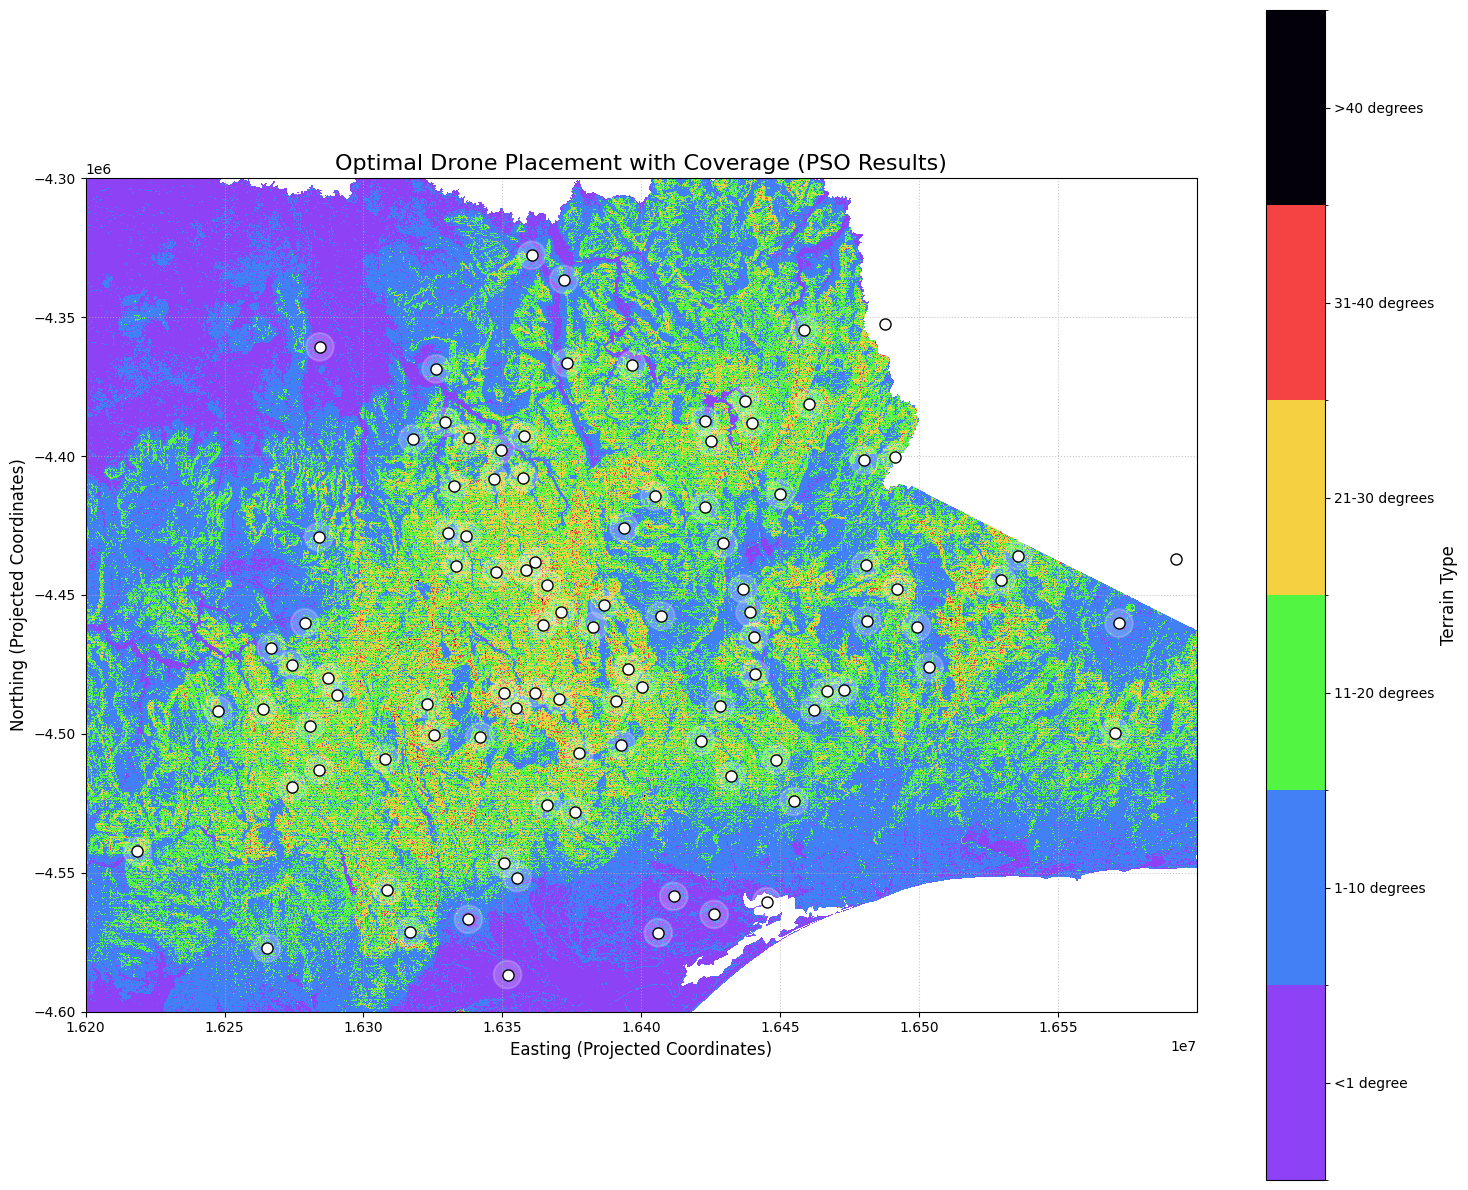

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Create a figure and axes object
plt.figure(figsize=(15, 12))

# Display the terrain classification map as the base layer
plt.imshow(terrain_classification_new, cmap=cmap, norm=norm, origin='upper', interpolation='nearest', extent=plot_extent)

# Add a title to the plot
plt.title('Optimal Drone Placement with Coverage (PSO Results)', fontsize=16)
plt.xlabel('Easting (Projected Coordinates)', fontsize=12)
plt.ylabel('Northing (Projected Coordinates)', fontsize=12)

# Add colorbar for terrain classification
cbar = plt.colorbar(ticks=[0, 1, 2, 3, 4, 5])
cbar.set_ticklabels(['<1 degree', '1-10 degrees', '11-20 degrees', '21-30 degrees', '31-40 degrees', '>40 degrees'])
cbar.set_label('Terrain Type', fontsize=12)

# Plot each optimal drone position and its coverage circle
for i, (drone_x, drone_y) in enumerate(optimal_drone_coords):
    # Plot the drone's position
    plt.plot(drone_x, drone_y, 'o', color='white', markersize=8, markeredgecolor='black', label=f'Drone {i+1} Position')

    # Plot the drone's coverage area as a circle
    circle = Circle((drone_x, drone_y), drone_coverage_radius_meters, color='white', alpha=0.2, edgecolor='red', linewidth=1.5)
    plt.gca().add_patch(circle)

plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

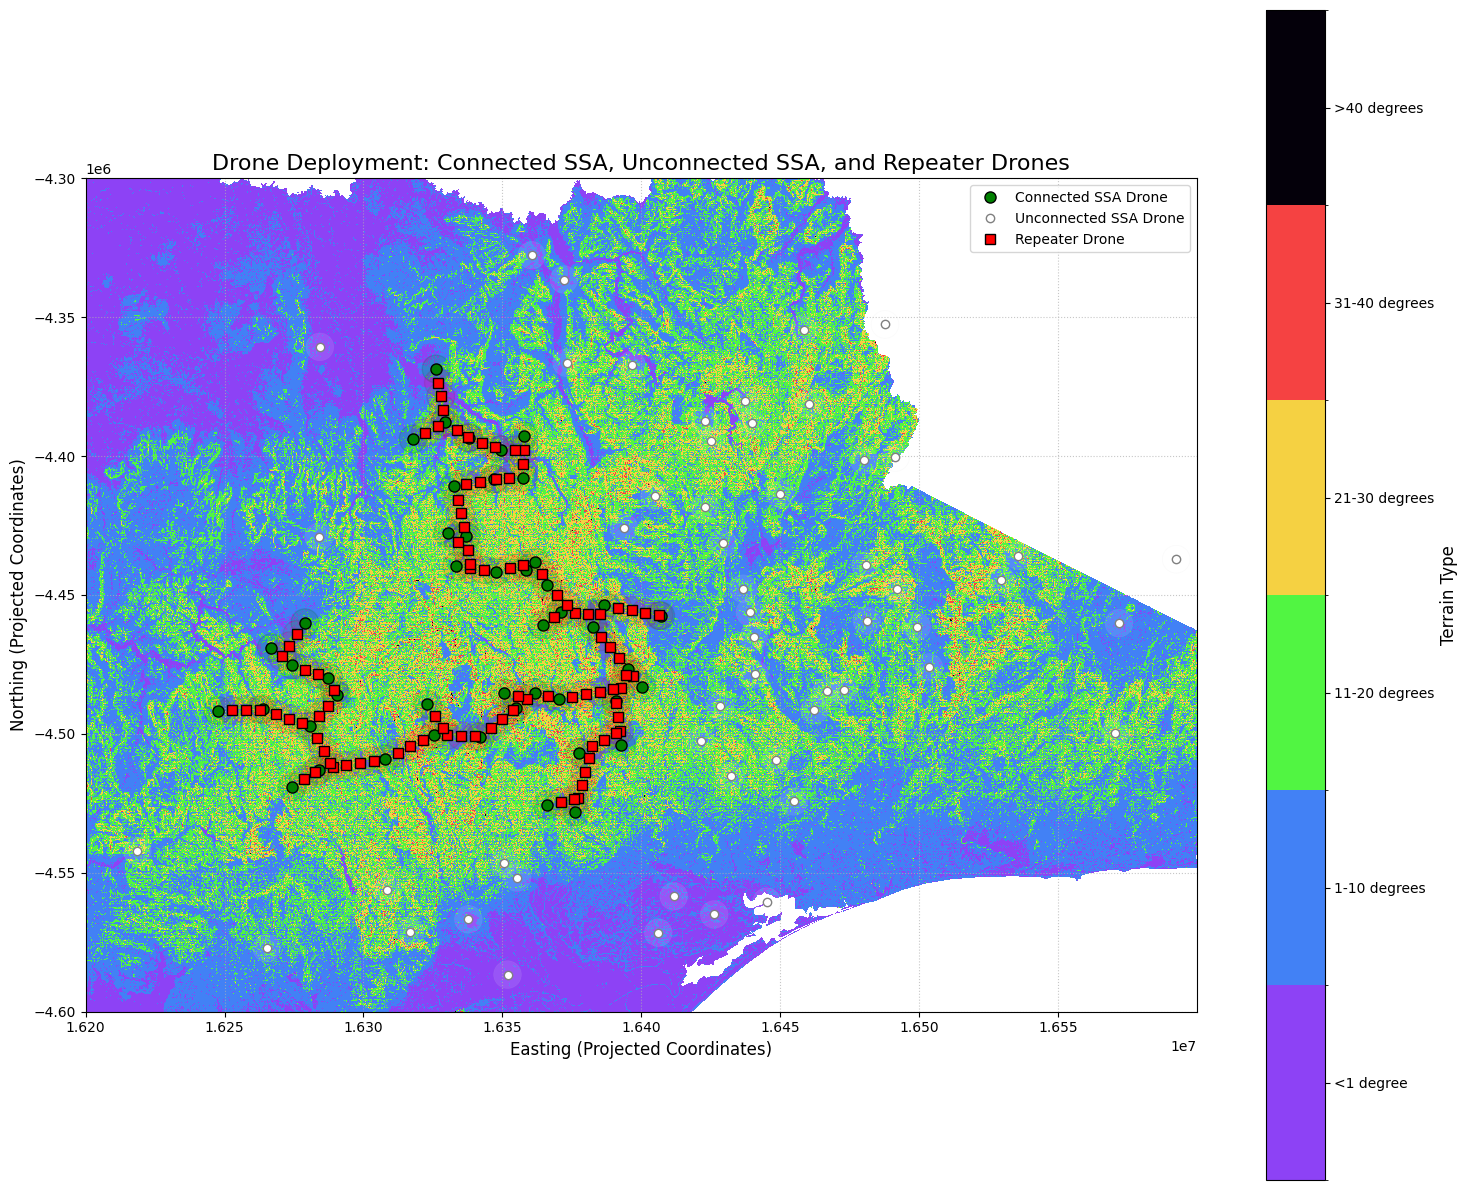

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Ensure optimal_drone_coords (initial SSA drones) is available for comparison
# (It should be from previous execution)
initial_ssa_drones = optimal_drone_coords.tolist()

# Identify unconnected SSA drones
# Convert to set for efficient comparison
connected_ssa_set = set(tuple(d) for d in connected_ssa_drones)
initial_ssa_set = set(tuple(d) for d in initial_ssa_drones)
unconnected_ssa_drones = [list(d) for d in initial_ssa_set - connected_ssa_set]

# Create a figure and axes object
plt.figure(figsize=(15, 12))

# Display the terrain classification map as the base layer
plt.imshow(terrain_classification_new, cmap=cmap, norm=norm, origin='upper', interpolation='nearest', extent=plot_extent)

# Add a title to the plot
plt.title('Drone Deployment: Connected SSA, Unconnected SSA, and Repeater Drones', fontsize=16)
plt.xlabel('Easting (Projected Coordinates)', fontsize=12)
plt.ylabel('Northing (Projected Coordinates)', fontsize=12)

# Add colorbar for terrain classification
cbar = plt.colorbar(ticks=[0, 1, 2, 3, 4, 5])
cbar.set_ticklabels(['<1 degree', '1-10 degrees', '11-20 degrees', '21-30 degrees', '31-40 degrees', '>40 degrees'])
cbar.set_label('Terrain Type', fontsize=12)

# Plot connected SSA drone positions and their coverage circles
connected_ssa_plotted = False
for drone_x, drone_y in connected_ssa_drones:
    if not connected_ssa_plotted:
        plt.plot(drone_x, drone_y, 'o', color='green', markersize=8, markeredgecolor='black', label='Connected SSA Drone')
        connected_ssa_plotted = True
    else:
        plt.plot(drone_x, drone_y, 'o', color='green', markersize=8, markeredgecolor='black')

    circle = Circle((drone_x, drone_y), communication_radius, facecolor='green', alpha=0.15, edgecolor='darkgreen', linewidth=1)
    plt.gca().add_patch(circle)

# Plot unconnected SSA drone positions and their coverage circles
unconnected_ssa_plotted = False
for drone_x, drone_y in unconnected_ssa_drones:
    if not unconnected_ssa_plotted:
        plt.plot(drone_x, drone_y, 'o', color='white', markersize=6, markeredgecolor='gray', label='Unconnected SSA Drone')
        unconnected_ssa_plotted = True
    else:
        plt.plot(drone_x, drone_y, 'o', color='white', markersize=6, markeredgecolor='gray')

    circle = Circle((drone_x, drone_y), communication_radius, facecolor='white', alpha=0.1, edgecolor='lightgray', linewidth=0.5)
    plt.gca().add_patch(circle)

# Plot repeater drone positions and their coverage circles
repeater_drones_plotted = False
for drone_x, drone_y in repeater_drones:
    if not repeater_drones_plotted:
        plt.plot(drone_x, drone_y, 's', color='red', markersize=7, markeredgecolor='black', label='Repeater Drone')
        repeater_drones_plotted = True
    else:
        plt.plot(drone_x, drone_y, 's', color='red', markersize=7, markeredgecolor='black')

    circle = Circle((drone_x, drone_y), communication_radius, facecolor='red', alpha=0.1, edgecolor='darkred', linewidth=1)
    plt.gca().add_patch(circle)

# Add a legend
plt.legend(loc='upper right')

plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

## Initialize Drone Lists for Optimization

### Subtask:
Initialize `ssa_drones` with `optimal_drone_coords` (all initial SSA drones). Set up empty lists for `connected_ssa_drones` and `repeater_drones`. Define `max_repeaters = 100` and `communication_radius = 5000`.


In [ ]:
ssa_drones = optimal_drone_coords.tolist()
connected_ssa_drones = []
repeater_drones = []
max_repeaters = 100
communication_radius = 5000 # meters, as per drone_coverage_radius_meters

print(f"Initial number of SSA drones: {len(ssa_drones)}")

Initial number of SSA drones: 100


In [ ]:
import math

def estimate_direct_repeaters(p1, p2, radius):
    """Calculates the minimum number of repeaters required for a direct communication link between two points.

    Args:
        p1 (list): The (x, y) coordinates of the first point.
        p2 (list): The (x, y) coordinates of the second point.
        radius (float): The communication radius of the drones.

    Returns:
        int: The minimum number of repeaters needed.
    """
    distance = math.dist(p1, p2)
    if distance <= radius:
        return 0  # No repeaters needed if within direct communication range
    else:
        # Number of segments needed = distance / radius
        # Number of repeaters = ceil(distance / radius) - 1
        # If distance = 1.5 * radius, need 2 segments, 1 repeater
        # If distance = 2.5 * radius, need 3 segments, 2 repeaters
        return math.ceil(distance / radius) - 1

print("Defined the helper function `estimate_direct_repeaters`.")

Defined the helper function `estimate_direct_repeaters`.


In [ ]:
import numpy as np

# Convert ssa_drones to a NumPy array for easier indexing and removal
ssa_drones_np = np.array(ssa_drones)

# Calculate the center of the map
mid_x = (min_x + max_x) / 2
mid_y = (min_y + max_y) / 2
map_center = np.array([mid_x, mid_y])

# Calculate the distance of each drone from the map center
distances_to_center = np.linalg.norm(ssa_drones_np - map_center, axis=1)

# Sort drones by their proximity to the center
sorted_indices = np.argsort(distances_to_center)
sorted_ssa_drones = ssa_drones_np[sorted_indices].tolist()

# Initialize the network with the first drone from the sorted list
if sorted_ssa_drones:
    connected_ssa_drones.append(sorted_ssa_drones.pop(0))
    # `network_nodes` will contain all drones currently part of the communication network (connected SSA + repeaters)
    network_nodes = [connected_ssa_drones[0]]
else:
    network_nodes = [] # No SSA drones to connect
    print("No SSA drones available to start the network.")

num_repeaters_added = 0

# Iterate through the remaining SSA drones to connect them to the network
while sorted_ssa_drones and num_repeaters_added < max_repeaters:
    # Find the closest unconnected SSA drone to any existing network node
    best_ssa_idx = -1
    min_repeaters_needed = float('inf')
    connection_point_for_ssa = None

    for ssa_idx, ssa_drone in enumerate(sorted_ssa_drones):
        for network_node in network_nodes:
            repeaters_needed = estimate_direct_repeaters(ssa_drone, network_node, communication_radius)
            if repeaters_needed < min_repeaters_needed:
                min_repeaters_needed = repeaters_needed
                best_ssa_idx = ssa_idx
                connection_point_for_ssa = network_node

    if best_ssa_idx != -1 and (num_repeaters_added + min_repeaters_needed) <= max_repeaters:
        # Connect this SSA drone
        drone_to_connect = sorted_ssa_drones.pop(best_ssa_idx)
        connected_ssa_drones.append(drone_to_connect)

        # Add repeaters if needed
        if min_repeaters_needed > 0:
            # Calculate intermediate repeater positions along the line segment between `drone_to_connect` and `connection_point_for_ssa`
            p1 = np.array(drone_to_connect)
            p2 = np.array(connection_point_for_ssa)
            direction = (p2 - p1) / np.linalg.norm(p2 - p1)

            for i in range(1, min_repeaters_needed + 1):
                # Place repeaters at `communication_radius` intervals from `drone_to_connect`
                repeater_pos = p1 + i * communication_radius * direction
                repeater_drones.append(repeater_pos.tolist())
                network_nodes.append(repeater_pos.tolist())
            num_repeaters_added += min_repeaters_needed

        # Add the newly connected SSA drone to network_nodes so it can act as a connection point for others
        network_nodes.append(drone_to_connect)
    else:
        # Cannot connect any more SSA drones with the remaining repeater budget
        break

# Combine all drone coordinates for visualization or further processing
all_drone_coords = connected_ssa_drones + repeater_drones

print(f"Total connected SSA drones: {len(connected_ssa_drones)}")
print(f"Total repeater drones used: {len(repeater_drones)}")
print(f"Remaining SSA drones (unconnected): {len(sorted_ssa_drones)}")
print(f"Total drones (SSA + Repeaters): {len(all_drone_coords)}")

Total connected SSA drones: 46
Total repeater drones used: 96
Remaining SSA drones (unconnected): 54
Total drones (SSA + Repeaters): 142


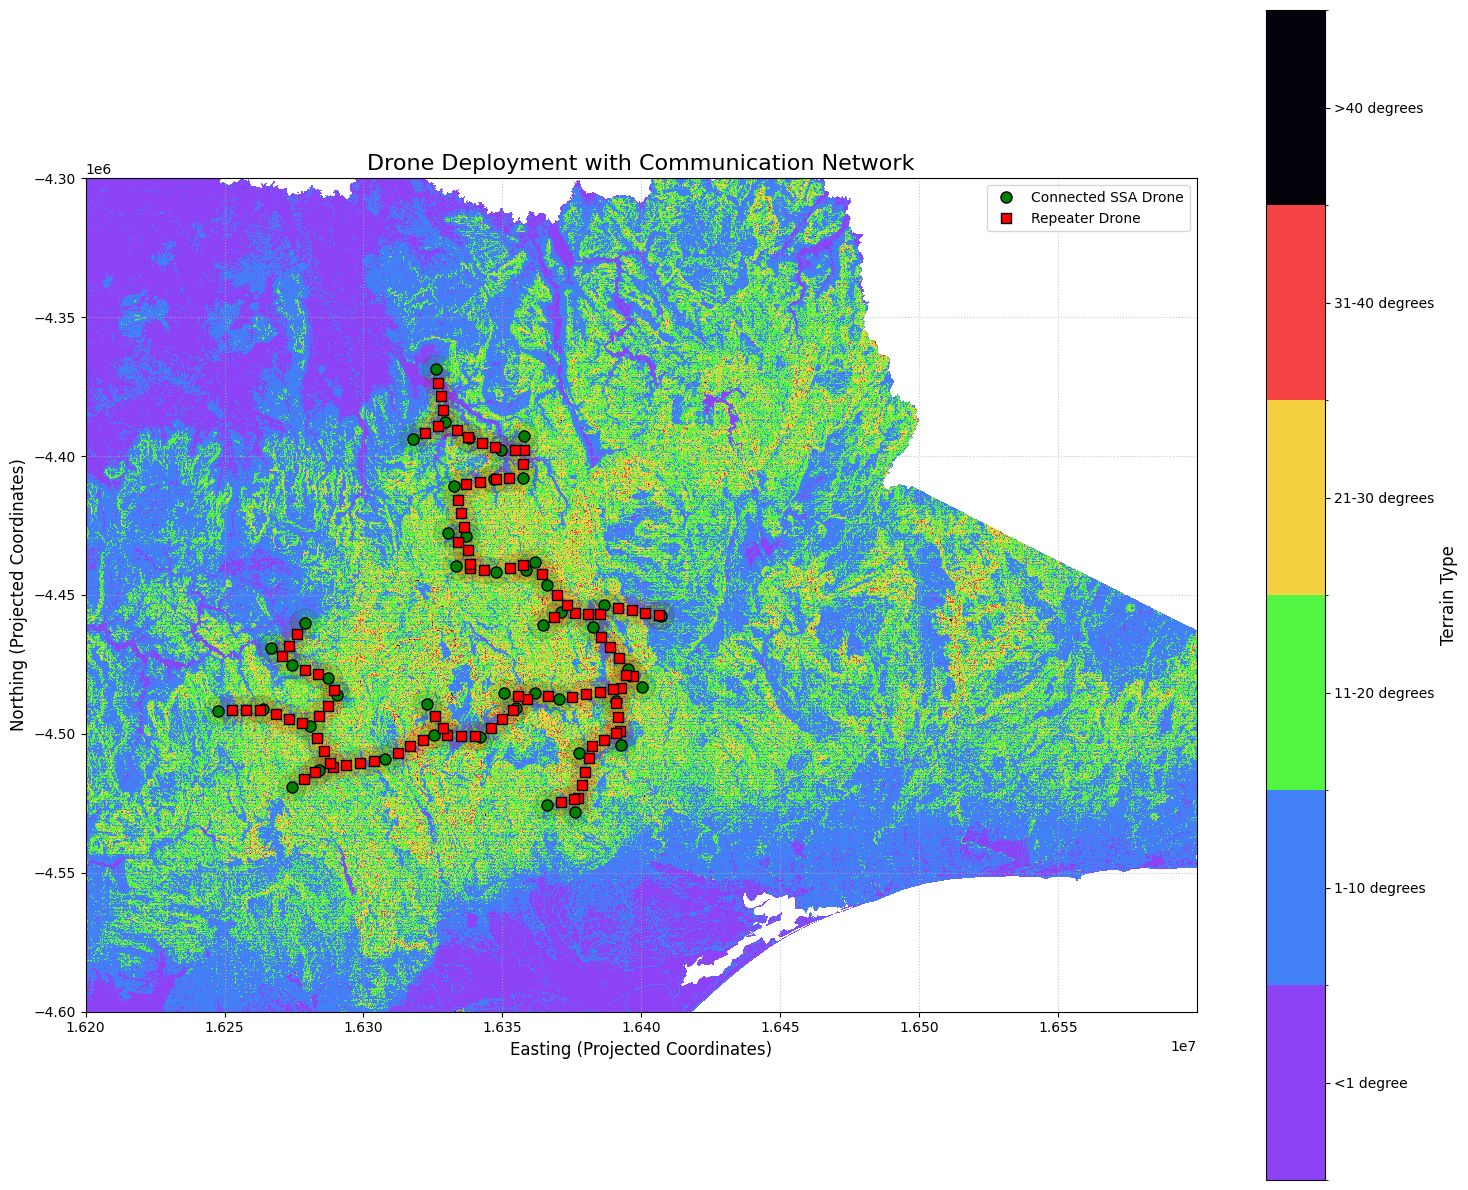

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Create a figure and axes object
plt.figure(figsize=(15, 12))

# Display the terrain classification map as the base layer
plt.imshow(terrain_classification_new, cmap=cmap, norm=norm, origin='upper', interpolation='nearest', extent=plot_extent)

# Add a title to the plot
plt.title('Drone Deployment with Communication Network', fontsize=16)
plt.xlabel('Easting (Projected Coordinates)', fontsize=12)
plt.ylabel('Northing (Projected Coordinates)', fontsize=12)

# Add colorbar for terrain classification
cbar = plt.colorbar(ticks=[0, 1, 2, 3, 4, 5])
cbar.set_ticklabels(['<1 degree', '1-10 degrees', '11-20 degrees', '21-30 degrees', '31-40 degrees', '>40 degrees'])
cbar.set_label('Terrain Type', fontsize=12)

# Plot each connected SSA drone position and its coverage circle
ssa_drones_plotted = False
for i, (drone_x, drone_y) in enumerate(connected_ssa_drones):
    if not ssa_drones_plotted:
        plt.plot(drone_x, drone_y, 'o', color='green', markersize=8, markeredgecolor='black', label='Connected SSA Drone')
        ssa_drones_plotted = True
    else:
        plt.plot(drone_x, drone_y, 'o', color='green', markersize=8, markeredgecolor='black')

    circle = Circle((drone_x, drone_y), communication_radius, facecolor='green', alpha=0.15, edgecolor='darkgreen', linewidth=1)
    plt.gca().add_patch(circle)

# Plot each repeater drone position and its coverage circle
repeater_drones_plotted = False
for i, (drone_x, drone_y) in enumerate(repeater_drones):
    if not repeater_drones_plotted:
        plt.plot(drone_x, drone_y, 's', color='red', markersize=7, markeredgecolor='black', label='Repeater Drone')
        repeater_drones_plotted = True
    else:
        plt.plot(drone_x, drone_y, 's', color='red', markersize=7, markeredgecolor='black')

    circle = Circle((drone_x, drone_y), communication_radius, facecolor='red', alpha=0.1, edgecolor='darkred', linewidth=1)
    plt.gca().add_patch(circle)

# Add a legend
plt.legend(loc='upper right')

plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()